<a href="https://colab.research.google.com/github/mrozikk/Data-Science-For-Beginners/blob/main/projekt_klasyfikacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from sklearn.linear_model import LogisticRegression


In [105]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [ ]:
df=pd.read_csv('Covid Data.csv')

In [ ]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
df['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
df['DATE_DIED'].value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [ ]:
df['DATE_DIED_EDIT'] = df['DATE_DIED'].replace('9999-99-99', '1')

In [ ]:
df['DATE_DIED_EDIT'].value_counts()

1             971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED_EDIT, Length: 401, dtype: int64

In [ ]:
len(df['DATE_DIED_EDIT'])

1048575

In [ ]:
df.loc[df['DATE_DIED_EDIT'] != '1', 'DATE_DIED_EDIT'] = '2'

In [ ]:
df['DATE_DIED_EDIT'].value_counts()


1    971633
2     76942
Name: DATE_DIED_EDIT, dtype: int64

In [ ]:
df[(df['PREGNANT']==97)].SEX.value_counts()

2    523511
Name: SEX, dtype: int64

In [ ]:
df.rename(columns=lambda x : x.lower(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   usmer                 1048575 non-null  int64 
 1   medical_unit          1048575 non-null  int64 
 2   sex                   1048575 non-null  int64 
 3   patient_type          1048575 non-null  int64 
 4   date_died             1048575 non-null  object
 5   intubed               1048575 non-null  int64 
 6   pneumonia             1048575 non-null  int64 
 7   age                   1048575 non-null  int64 
 8   pregnant              1048575 non-null  int64 
 9   diabetes              1048575 non-null  int64 
 10  copd                  1048575 non-null  int64 
 11  asthma                1048575 non-null  int64 
 12  inmsupr               1048575 non-null  int64 
 13  hipertension          1048575 non-null  int64 
 14  other_disease         1048575 non-null  int64 
 15

In [ ]:
df['elderly'] = [2 if each < 65 else 1 for each in df['age']]

In [ ]:
df['elderly'].value_counts()

2    943747
1    104828
Name: elderly, dtype: int64

In [ ]:
df['pregnant'].replace(97, 2, inplace=True)

In [ ]:
df['pregnant'].value_counts()

2     1036690
1        8131
98       3754
Name: pregnant, dtype: int64

In [ ]:
df['date_died_edit']=df['date_died_edit'].astype('int64')

<ipython-input-61-79549a46aea1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, fmt=".2f");


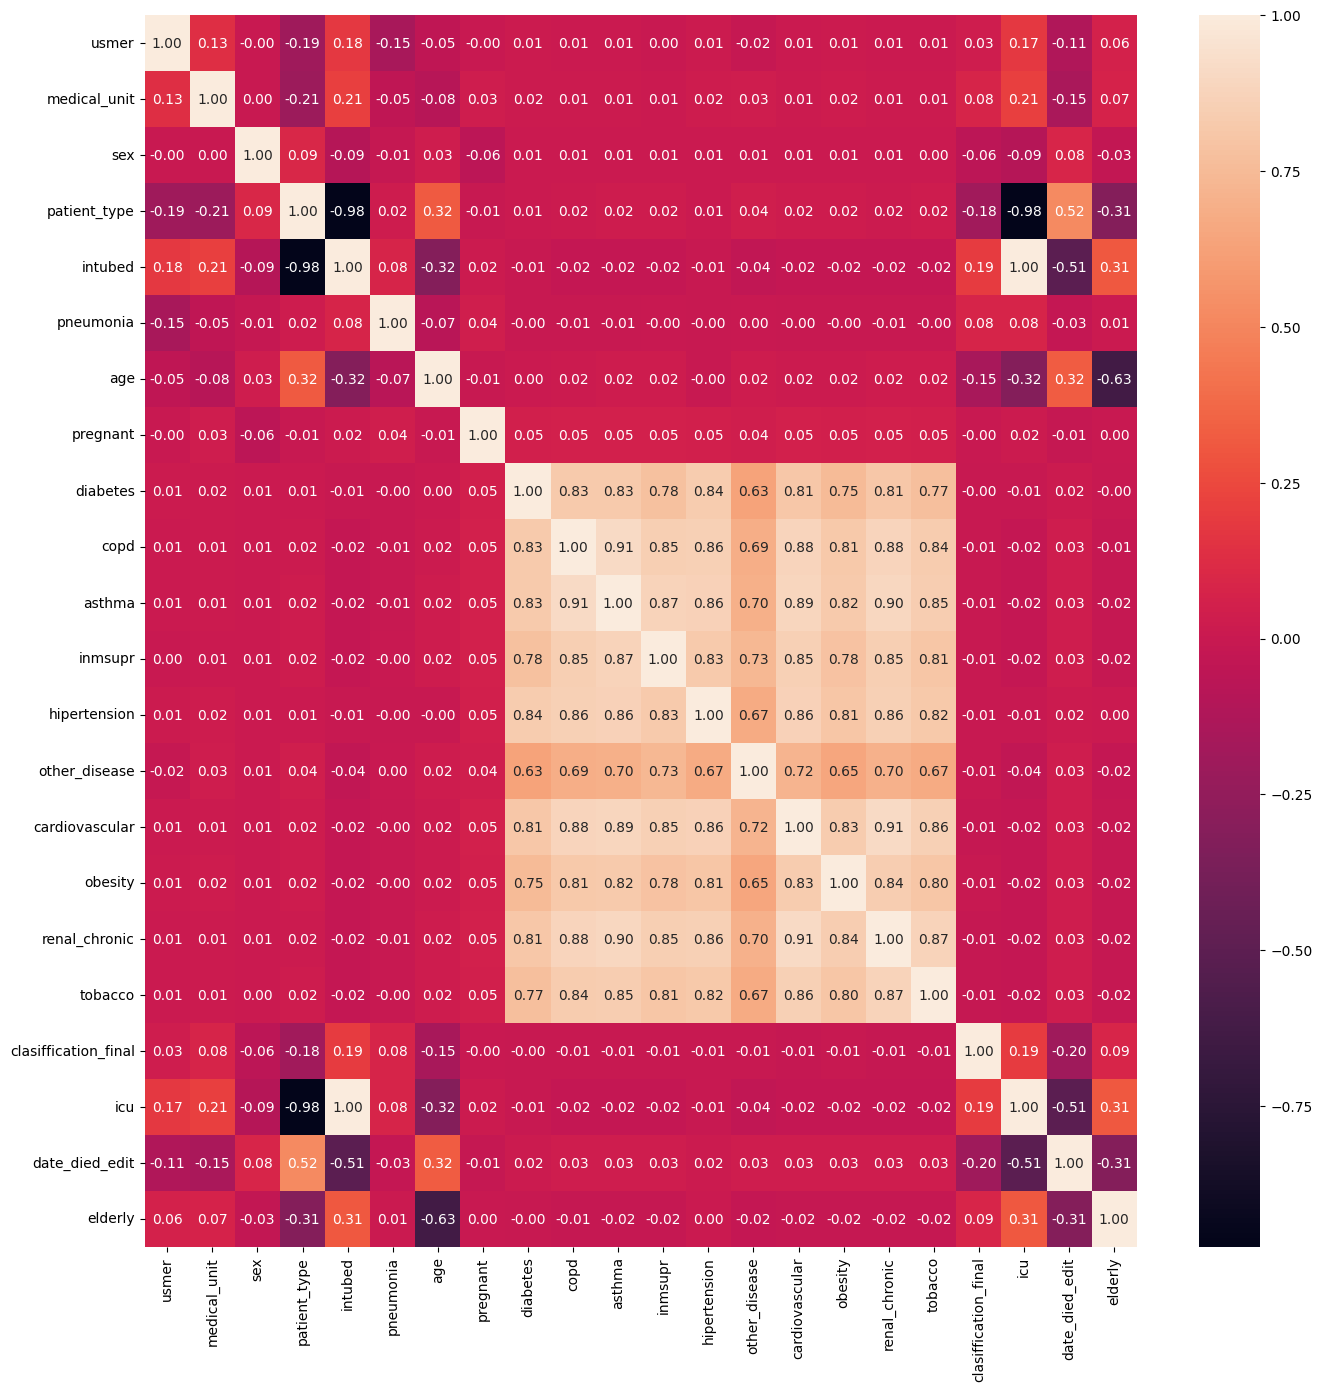

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(data=df.corr(), annot=True, fmt=".2f");

In [ ]:
df.shape

(1048575, 23)

In [ ]:
col = ["sex", "pregnant", "clasiffication_final", "icu"]
df.drop(columns = col, inplace=True)

In [ ]:
col1 = ["intubed"]
df.drop(columns = col1, inplace=True)

<ipython-input-65-98b936a4dd53>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


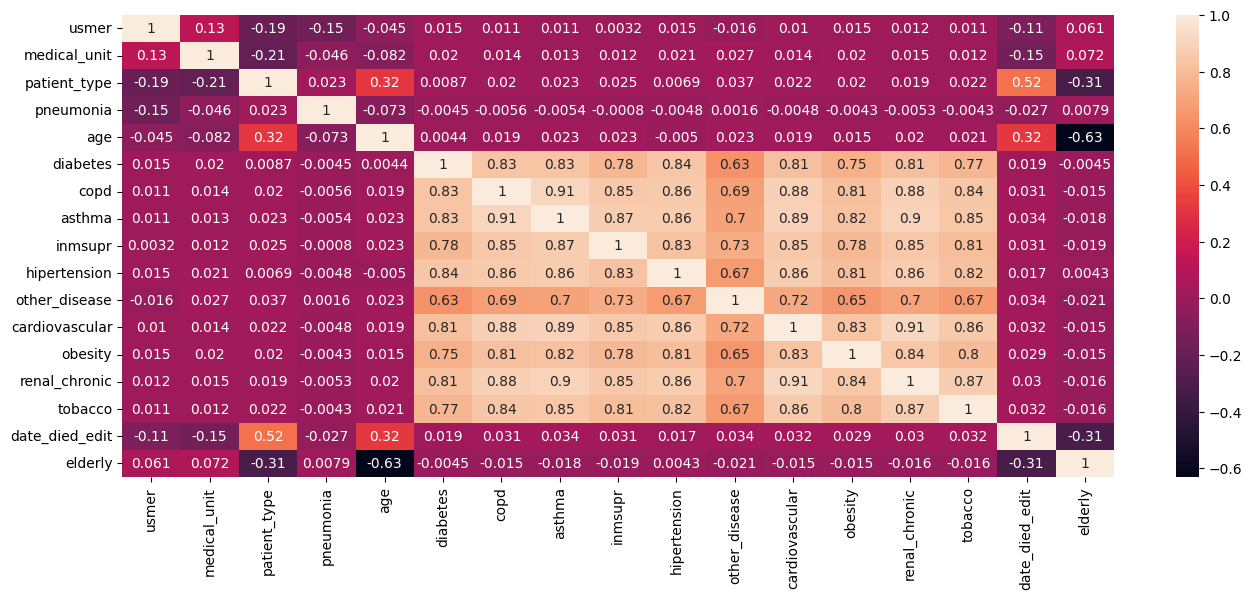

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True);

In [ ]:
df['date_died_edit'].value_counts()

1    971633
2     76942
Name: date_died_edit, dtype: int64

In [ ]:
df['death'] = [2 if each == 1 else 1 for each in df['date_died_edit'] ]

In [ ]:
df['death'].value_counts()

2    971633
1     76942
Name: death, dtype: int64

In [ ]:
df.drop(columns="date_died_edit", inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   usmer           1048575 non-null  int64 
 1   medical_unit    1048575 non-null  int64 
 2   patient_type    1048575 non-null  int64 
 3   date_died       1048575 non-null  object
 4   pneumonia       1048575 non-null  int64 
 5   age             1048575 non-null  int64 
 6   diabetes        1048575 non-null  int64 
 7   copd            1048575 non-null  int64 
 8   asthma          1048575 non-null  int64 
 9   inmsupr         1048575 non-null  int64 
 10  hipertension    1048575 non-null  int64 
 11  other_disease   1048575 non-null  int64 
 12  cardiovascular  1048575 non-null  int64 
 13  obesity         1048575 non-null  int64 
 14  renal_chronic   1048575 non-null  int64 
 15  tobacco         1048575 non-null  int64 
 16  elderly         1048575 non-null  int64 
 17  death   

<ipython-input-71-98b936a4dd53>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


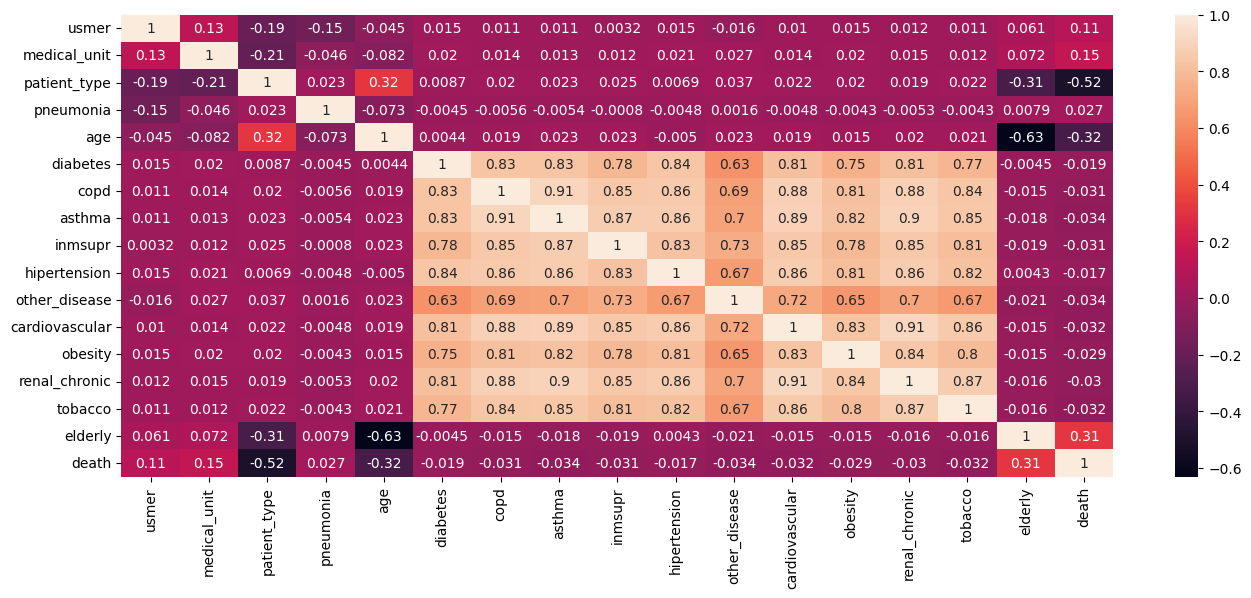

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True);

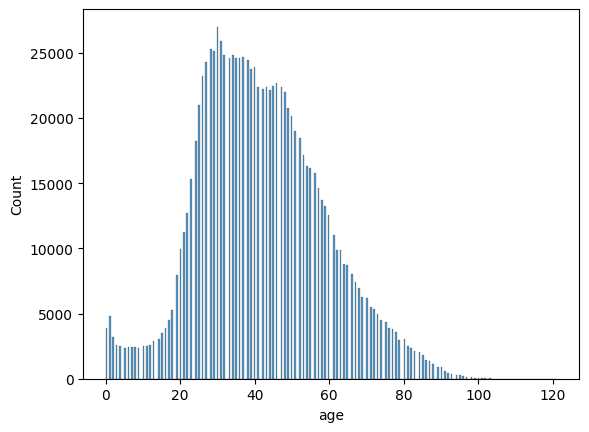

In [ ]:
sns.histplot(data=df['age']);

In [ ]:
y=df.pop('death').astype('category').cat.codes


In [ ]:
c=df.pop('date_died')
X=df

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [ ]:
rf_model=RandomForestClassifier(n_estimators=100, random_state=123, max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [ ]:
y_rf_train=rf_model.predict(X_train)
y_rf_test=rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_train, y_rf_train)

0.9363052237560499

In [ ]:
accuracy_score(y_test, y_rf_test)

0.934444364971509

<Axes: >

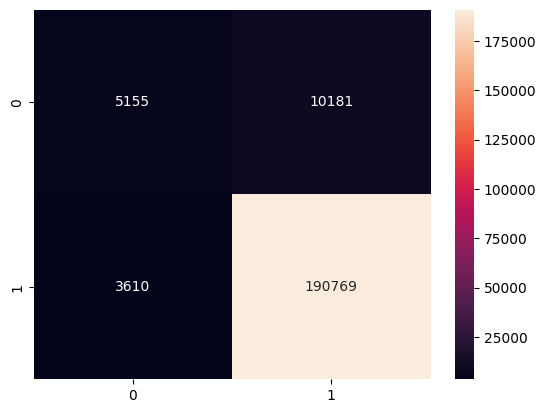

In [110]:
cm=confusion_matrix(y_test, y_rf_test)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
#boosting


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adaboost_model=AdaBoostClassifier(n_estimators=30)
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=30)

In [ ]:
y_ada_train=adaboost_model.predict(X_train)
y_ada_test=adaboost_model.predict(X_test)

In [ ]:
accuracy_score(y_train, y_ada_train)

0.9332689602555849

In [ ]:
accuracy_score(y_test, y_ada_test)

0.9329613999952316

<Axes: >

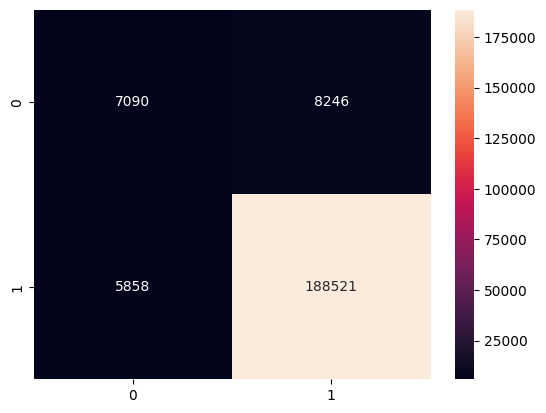

In [111]:
cm=confusion_matrix(y_test, y_ada_test)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grad_model=GradientBoostingClassifier(n_estimators=100, random_state=123)

In [ ]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=123)

In [ ]:
y_grad_train=grad_model.predict(X_train)
y_grad_test=grad_model.predict(X_test)

In [ ]:
accuracy_score(y_train, y_grad_train)

0.935430226736285

In [ ]:
accuracy_score(y_test, y_grad_test)

0.934482511980545

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_train=dt.predict(X_train)

In [ ]:
y_pred_test=dt.predict(X_test)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.70      0.63      0.66     61420
           1       0.97      0.98      0.97    777440

    accuracy                           0.95    838860
   macro avg       0.84      0.80      0.82    838860
weighted avg       0.95      0.95      0.95    838860



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.50      0.45      0.48     15522
           1       0.96      0.96      0.96    194193

    accuracy                           0.93    209715
   macro avg       0.73      0.71      0.72    209715
weighted avg       0.92      0.93      0.92    209715



In [ ]:
dt.get_depth()

37

In [ ]:
fpr_dt, tpr_dt, _=roc_curve(y_test, y_pred_test)
fpr_rf, tpr_rf, _=roc_curve(y_test, y_rf_test)
fpr_ada, tpr_ada, _=roc_curve(y_test, y_ada_test)
fpr_grad, tpr_grad, _=roc_curve(y_test, y_grad_test)

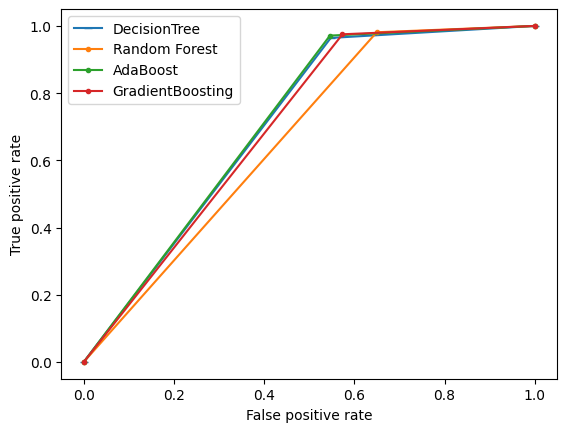

In [ ]:
plt.plot(fpr_dt, tpr_dt, marker='_', label='DecisionTree')
plt.plot(fpr_rf, tpr_rf, marker='.', label='Random Forest')
plt.plot(fpr_ada, tpr_ada, marker='.', label='AdaBoost')
plt.plot(fpr_grad, tpr_grad, marker='.', label='GradientBoosting')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()